<a href="https://colab.research.google.com/github/hig3r/2percentsilk-haikus-for-codespaces./blob/main/th_d13_0_arma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 自己回帰モデル 移動平均モデル AR(m) MA(k) and ARMA(m,k) models

In [ ]:
# ライブラリ導入(今回は使わないものも含む)と準備
import numpy as np #数値計算
from scipy import stats # よく知られた確率分布

import matplotlib.pyplot as plt #低レベルグラフ描画
%matplotlib inline 
#グラフを別ウィンドウにしない

# !pip install japanize_matplotlib #shell commandで追加パッケージインストール
# import japanize_matplotlib #matplotlib日本語化

import pandas as pd #標本を表構造で, 高レベル(抽象化された)統計グラフ描画
import seaborn as sns #もっと高レベルの統計分析と統計グラフ描画
# sns.set(font="IPAexGothic") #日本語フォント設定

島田直希 時系列解析 共立出版 2019

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
np.random.seed(1)

## 自己回帰モデルAR(m)

### AR(m)モデルのシミュレーション
https://campus.datacamp.com/courses/time-series-analysis-in-python/autoregressive-ar-models
https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.ArmaProcess.html

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess

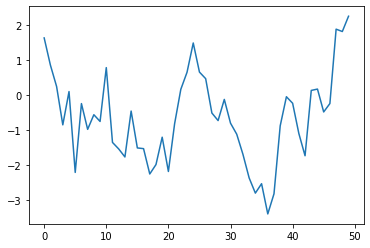

In [ ]:
ar=[1,-0.9]  # 符号は逆にとる
ma=[1]
AR=ArmaProcess(ar,ma)
x=AR.generate_sample(nsample=50) 
plt.plot(x)

In [ ]:
x

array([ 0.30017032, -0.08209656, -1.2164051 , -1.44410731, -1.50859082,
       -0.77110854,  0.14498573,  1.06158923,  1.24101764,  2.00205704,
        1.04745339,  2.19557621,  2.48894841,  1.94196073,  2.23628281,
        1.93708281,  2.87500392,  4.10732034,  5.88216371,  3.89745101,
        2.0635921 ,  1.35276703,  1.3775274 ,  2.11594358,  2.21998417,
       -0.02421547, -0.32799793,  0.5327765 ,  0.70959359,  1.40064541,
        1.03825273,  0.73366938,  0.84686384,  1.1722291 ,  1.25330591,
        1.24698397,  0.45162328,  0.78402474,  0.82744354,  1.87418309,
        2.88568266,  2.78227081,  2.12875878,  1.2771525 ,  1.5729316 ,
        1.49297851,  0.99982698,  0.94344114,  0.22909618,  0.9042186 ])

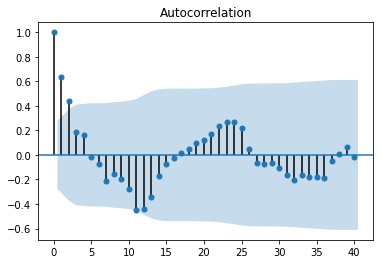

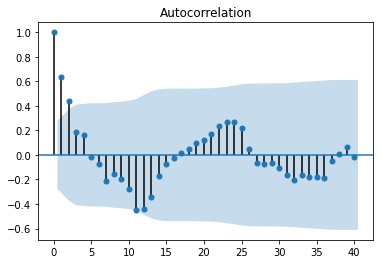

In [ ]:
sm.graphics.tsa.plot_acf(x,lags=40)

#### 手で同じことをするには?

In [ ]:
from scipy import stats

In [ ]:
x2=[2]
t=1
phi1=-0.9 # AR(1)
for t in range(1,100,1):
  x2next=x2[t-1]*phi1 + stats.norm(loc=0,scale=1).rvs(size=1)[0] # sigma=1
  x2.append(x2next)

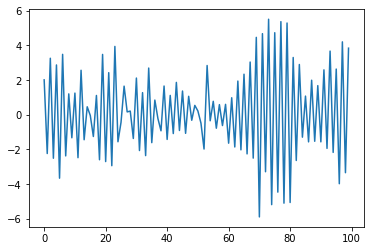

In [ ]:
plt.plot(x2)

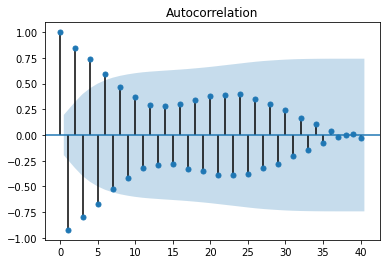

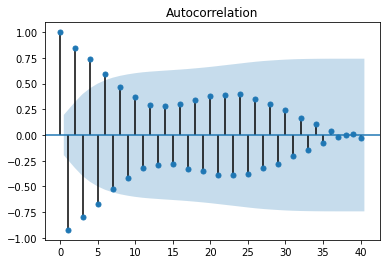

In [ ]:
# コレログラム
sm.graphics.tsa.plot_acf(x2,lags=40) 

#### 現実データ

In [ ]:
dfice=pd.read_csv("https://www.data.math.ryukoku.ac.jp/course/mva_2021/data/icecream.csv",skiprows=[0],index_col=0,parse_dates=True)
dfice.head()

,アイスクリーム
date,
2003-01-01,331
2003-02-01,268
2003-03-01,365
2003-04-01,492
2003-05-01,632


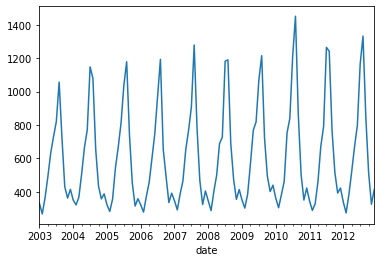

In [ ]:
dfice['アイスクリーム'].plot()

In [ ]:
x3=dfice.diff().dropna() 
x3_train=dfice.diff()[:100].dropna() # 100まで, NaNすてる
x3_train

,アイスクリーム
date,
2003-02-01,-63.0
2003-03-01,97.0
2003-04-01,127.0
2003-05-01,140.0
2003-06-01,98.0
...,...
2010-12-01,72.0
2011-01-01,-77.0
2011-02-01,-57.0


### AR(m)モデルの推定

In [ ]:
from statsmodels.tsa import ar_model

In [ ]:
AR = ar_model.AR(x2)

In [ ]:
for i in range(20):  # for(i=1;i<=20;i++)
  result=AR.fit(maxlag=i+1)  # 係数の個数を増やしてfit
  print('lag=',i+1,'aic:',result.aic)

lag= 1 aic: -0.09371343637075236
lag= 2 aic: -0.06708612987433483
lag= 3 aic: -0.09954556037567908
lag= 4 aic: -0.07560024735280804
lag= 5 aic: -0.0824358568312829
lag= 6 aic: -0.062357357122701546
lag= 7 aic: -0.03007097142545323
lag= 8 aic: 0.0012834262640789296
lag= 9 aic: -0.0054989410075095835
lag= 10 aic: 0.02396130417938791
lag= 11 aic: 0.05673294573510396
lag= 12 aic: 0.01953349081573702
lag= 13 aic: -0.0073531442806283875
lag= 14 aic: 0.02969106741938493
lag= 15 aic: 0.011295342937232777
lag= 16 aic: 0.037225862742268745
lag= 17 aic: 0.023981145412767413
lag= 18 aic: 0.04940654804278899
lag= 19 aic: -0.008520932018199923
lag= 20 aic: -0.02878744616233997


In [ ]:
result=AR.fit(maxlag=12, ic='aic')
result.k_ar

5

AR(1)だったんだけど, m=5 としたほうがいい推定だというお告げ

In [ ]:
result.fittedvalues

array([-2.80597865,  3.69613161, -2.83737837,  2.4827696 , -1.22975656,
        1.49080002, -0.67418061,  2.34780376, -2.0456085 ,  1.51546662,
       -0.6515456 ,  0.27216014,  1.62834818, -0.86488994,  2.88323285,
       -3.11730599,  2.58242941, -2.58649525,  3.09017752, -3.3213212 ,
        1.29660331,  0.08156937, -1.10660521,  0.30793383, -0.85658659,
        1.52127   , -1.34394351,  2.12388783, -1.27877668,  2.70287711,
       -2.11264882,  1.48464963, -1.01198888,  0.439427  ,  1.24975629,
       -1.42570146,  1.56330854, -1.18463007,  1.34683426, -1.56517168,
        0.75688475, -1.37213641,  1.13543885, -0.74200058,  0.48013414,
       -0.43138843, -0.18845864,  0.61974128,  2.17591318, -1.94560875,
        0.34483819, -1.56678628,  0.77051316,  0.06433525,  0.86104934,
       -0.37655307,  1.72457587, -0.54209514,  2.14581052, -1.65096678,
        1.99022879, -2.20416989,  2.23538547, -2.78276889,  2.38516735,
       -4.26944648,  5.51244921, -3.95430213,  3.8611815 , -5.53

In [ ]:
result.predict(99+1,118)

2011-06-01    202.607401
2011-07-01    409.275529
2011-08-01    173.967723
2011-09-01   -520.613354
2011-10-01   -426.101388
2011-11-01   -153.401367
2011-12-01     54.886780
2012-01-01    -63.477694
2012-02-01    -69.237862
2012-03-01     48.597141
2012-04-01    121.275087
2012-05-01    207.893155
2012-06-01    255.074438
2012-07-01    433.085535
2012-08-01    139.402013
2012-09-01   -488.598304
2012-10-01   -468.514392
2012-11-01   -167.492157
2012-12-01     43.145400
Freq: MS, dtype: float64

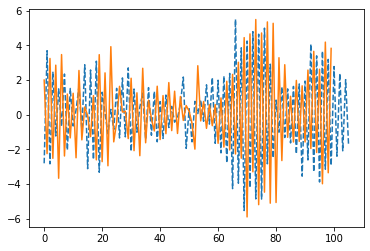

In [ ]:
plt.plot(np.hstack([result.fittedvalues,result.predict(100,110)]),'--',label="forecast")
plt.plot(x2)

In [ ]:
AR3 = ar_model.AR(x3_train)
for i in range(20):
  result=AR3.fit(maxlag=i+1)
  print('lag=',i+1,'aic:',result.aic)

lag= 1 aic: 10.623349835083612
lag= 2 aic: 10.605625887136187
lag= 3 aic: 10.631794365499909
lag= 4 aic: 10.653968819566964
lag= 5 aic: 10.639020494849978
lag= 6 aic: 10.497805079154896
lag= 7 aic: 10.50164556083358
lag= 8 aic: 10.347418412668333
lag= 9 aic: 10.145773136713263
lag= 10 aic: 9.54739319159168
lag= 11 aic: 8.688494352586085
lag= 12 aic: 8.726168706454176
lag= 13 aic: 8.749080458269447
lag= 14 aic: 8.787463716774608
lag= 15 aic: 8.822181088075927
lag= 16 aic: 8.861619646480912
lag= 17 aic: 8.900710667979508
lag= 18 aic: 8.712739176754758
lag= 19 aic: 8.74636247304398
lag= 20 aic: 8.766450545272322


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


lag=11 is the best

In [ ]:
result=AR3.fit(maxlag=12, ic='aic') # AICの魔法でいいものを選ぶ
result.k_ar

11

In [ ]:
result.fittedvalues

date
2004-01-01    -70.698524
2004-02-01    -88.133058
2004-03-01     58.340354
2004-04-01    122.597653
2004-05-01    140.214788
                 ...    
2010-12-01     82.009691
2011-01-01    -61.113872
2011-02-01    -51.109850
2011-03-01     87.615880
2011-04-01    132.661170
Length: 88, dtype: float64

In [ ]:
result.predict(99,118)

2011-05-01    277.247254
2011-06-01    149.111601
2011-07-01    391.112379
2011-08-01    177.088777
2011-09-01   -521.335480
2011-10-01   -422.408521
2011-11-01   -158.876845
2011-12-01     61.674697
2012-01-01    -69.436864
2012-02-01    -68.057565
2012-03-01     45.197258
2012-04-01    137.472588
2012-05-01    267.168629
2012-06-01    209.151406
2012-07-01    403.364686
2012-08-01    139.636030
2012-09-01   -486.161061
2012-10-01   -464.554839
2012-11-01   -173.992351
2012-12-01     52.116029
Freq: MS, dtype: float64

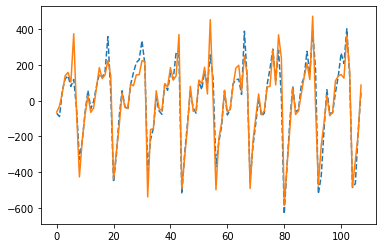

In [ ]:
# 再現値, 予測値
plt.plot(np.hstack([result.fittedvalues,result.predict(99,118)]),'--',label="forecast")
plt.plot(x3.dropna()[11:].values)

## 移動平均モデル

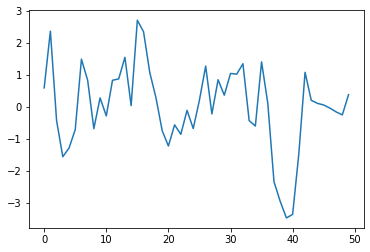

In [ ]:
ar=[1]
ma=[1,0.5] # 符号そのまま
MA=ArmaProcess(ar,ma)
x3=MA.generate_sample(nsample=50) 
plt.plot(x3)

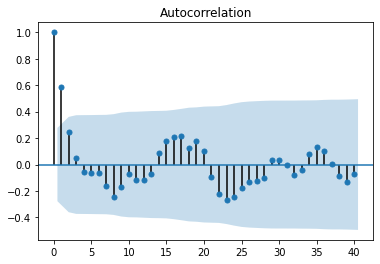

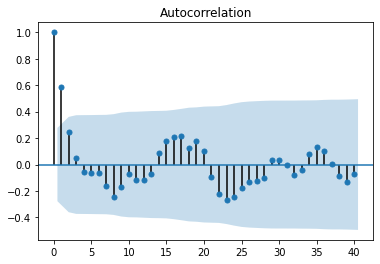

In [ ]:
sm.graphics.tsa.plot_acf(x3,lags=40) 